##⚠️ **Önemli Not**:
**Bu çalışma, yalnızca Python programlama dili ile veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.
İçerikte yer alan hisse senedi fiyatları, döviz kurları ve diğer finansal veriler yalnızca eğitim amaçlı kullanılmıştır.
Bu dosyada yer alan hiçbir analiz, yatırım tavsiyesi niteliği taşımamaktadır.
Verilerde eksiklikler veya modelleme hataları olabilir; çalışma bir öğrenme sürecinin parçasıdır.**

# Türkiye Gıda Perakende Sektörü Hisse Analizi

Bu projede BİM (BIMAS), Migros (MGROS) ve Şok Marketler (SOKM) hisselerinin zaman içindeki fiyat değişimleri analiz edilmiştir. Veriler yfinance kütüphanesi kullanılarak Google Finance üzerinden çekilmiştir.


In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## 1. Döviz Kuru (USD/TRY) Verisinin Eklenmesi

Bu bölümde, hisse senedi fiyatlarını dolar bazında da inceleyebilmek amacıyla `USD/TRY` döviz kuru verisi `yfinance` kütüphanesi ile çekilmiştir. Böylece hisselerin hem TL hem de USD cinsinden grafikleri oluşturulabilecektir.

In [ ]:
usdtry = yf.Ticker("USDTRY=X")
usdtry_data = usdtry.history(period="max")
usdtry_data.reset_index(inplace=True)
usdtry_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5322,2025-06-23 00:00:00+01:00,39.720501,39.729801,39.668301,39.720501,0,0.0,0.0
5323,2025-06-24 00:00:00+01:00,39.670700,39.675499,39.552849,39.670700,0,0.0,0.0
5324,2025-06-25 00:00:00+01:00,39.624500,39.749222,39.525551,39.624500,0,0.0,0.0
5325,2025-06-26 00:00:00+01:00,39.758598,39.780090,39.731869,39.758598,0,0.0,0.0
5326,2025-06-27 00:00:00+01:00,39.837429,39.884701,39.635201,39.882099,0,0.0,0.0


## 2. BİM Analizi

Bu bölümde, `BİM Birleşik Mağazalar A.Ş.` (BIMAS.IS) hisse senedi verileri `yfinance` kütüphanesi kullanılarak çekilmiş, ardından TL bazlı ve `USD/TRY` kuru ile dönüştürülmüş USD bazlı grafikler hazırlanmıştır. Böylece yatırımcının hem yerel para birimi hem de döviz bazında getirisi karşılaştırmalı olarak analiz edilmiştir.


In [ ]:
bim = yf.Ticker("BIMAS.IS")
bim_data = bim.history(period="max")
bim_data.reset_index(inplace=True)
bim_data['Date'] = pd.to_datetime(bim_data['Date']).dt.date

In [ ]:
usdtry = yf.Ticker("USDTRY=X")
usdtry_data = usdtry.history(period="max")
usdtry_data.reset_index(inplace=True)
usdtry_data['Date'] = pd.to_datetime(usdtry_data['Date']).dt.date

In [ ]:
usdtry_data_renamed = usdtry_data[["Date", "Close"]].rename(columns={"Close": "USDTRY_Close"})

In [ ]:
bim_usd = pd.merge(bim_data, usdtry_data_renamed, on="Date", how="inner")
bim_usd["Close_USD"] = bim_usd["Close"] / bim_usd["USDTRY_Close"]

In [ ]:
bim_usd[['Date', 'Close', 'USDTRY_Close', 'Close_USD']].tail(10)

,Date,Close,USDTRY_Close,Close_USD
5083,2025-06-16,492.551697,39.368000,12.511474
5084,2025-06-17,499.000000,39.387600,12.668962
5085,2025-06-18,481.500000,39.520901,12.183427
5086,2025-06-19,475.500000,39.534100,12.027591
5087,2025-06-20,469.250000,39.663700,11.830717
5088,2025-06-23,456.750000,39.720501,11.499100
5089,2025-06-24,489.000000,39.670700,12.326478
5090,2025-06-25,476.500000,39.624500,12.025388
5091,2025-06-26,467.500000,39.758598,11.758463
5092,2025-06-27,462.500000,39.883499,11.596274


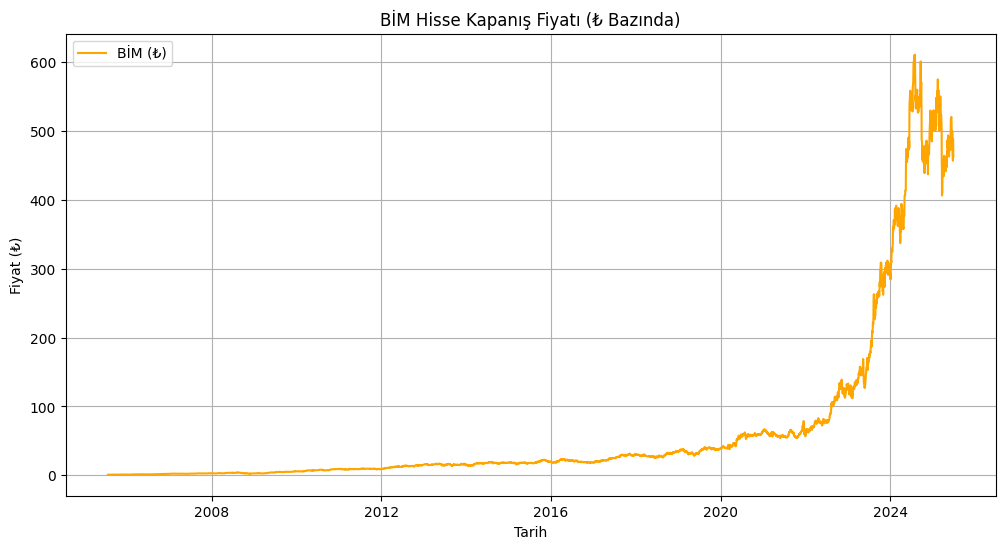

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(bim_data['Date'], bim_data['Close'], label="BİM (₺)", color="orange")
plt.title("BİM Hisse Kapanış Fiyatı (₺ Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()
plt.show()

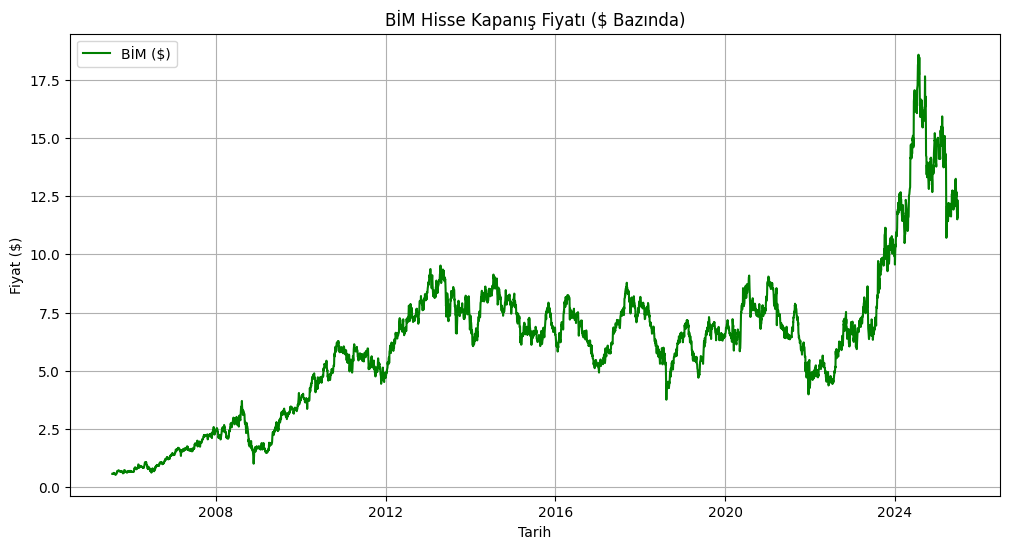

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(bim_usd['Date'], bim_usd['Close_USD'], label="BİM ($)", color="green")
plt.title("BİM Hisse Kapanış Fiyatı ($ Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.grid(True)
plt.legend()
plt.show()

## 3. Migros Analizi

Bu bölümde, `Migros` (MGROS.IS) hisse senedi verileri `yfinance` kütüphanesi kullanılarak çekilmiş, veriler işlenmiş ve hem TL bazlı hem de USD bazlı grafiklerle görselleştirilmiştir. USD grafiği için aynı dönemlere ait `USD/TRY` kuru verileri de eklenerek hisse fiyatları dolar cinsine dönüştürülmüştür.

In [ ]:
migros = yf.Ticker("MGROS.IS")
migros_data = migros.history(period="max")
migros_data.reset_index(inplace=True)
migros_data['Date'] = pd.to_datetime(migros_data['Date']).dt.date
migros_data = migros_data[migros_data['Close'] > 0]

In [ ]:
usdtry = yf.Ticker("USDTRY=X")
usdtry_data = usdtry.history(period="max")
usdtry_data.reset_index(inplace=True)
usdtry_data["Date"] = pd.to_datetime(usdtry_data["Date"]).dt.date
usdtry_data = usdtry_data[["Date", "Close"]].rename(columns={"Close": "USDTRY_Close"})

In [ ]:
migros_usd = pd.merge(migros_data, usdtry_data, on="Date", how="inner")
migros_usd["Close_USD"] = migros_usd["Close"] / migros_usd["USDTRY_Close"]

In [ ]:
migros_usd = migros_usd[migros_usd["Date"] >= pd.to_datetime("2008-01-01").date()]
migros_usd = migros_usd[migros_usd["Close"] > 0]

In [ ]:
migros_usd[["Date", "Close", "USDTRY_Close", "Close_USD"]].tail(10)

,Date,Close,USDTRY_Close,Close_USD
5226,2025-06-16,474.00,39.368000,12.040236
5227,2025-06-17,473.00,39.387600,12.008856
5228,2025-06-18,452.75,39.520901,11.455964
5229,2025-06-19,457.25,39.534100,11.565965
5230,2025-06-20,456.00,39.663700,11.496658
5231,2025-06-23,457.00,39.720501,11.505394
5232,2025-06-24,480.50,39.670700,12.112214
5233,2025-06-25,471.75,39.624500,11.905513
5234,2025-06-26,465.00,39.758598,11.695583
5235,2025-06-27,459.50,39.869598,11.525072


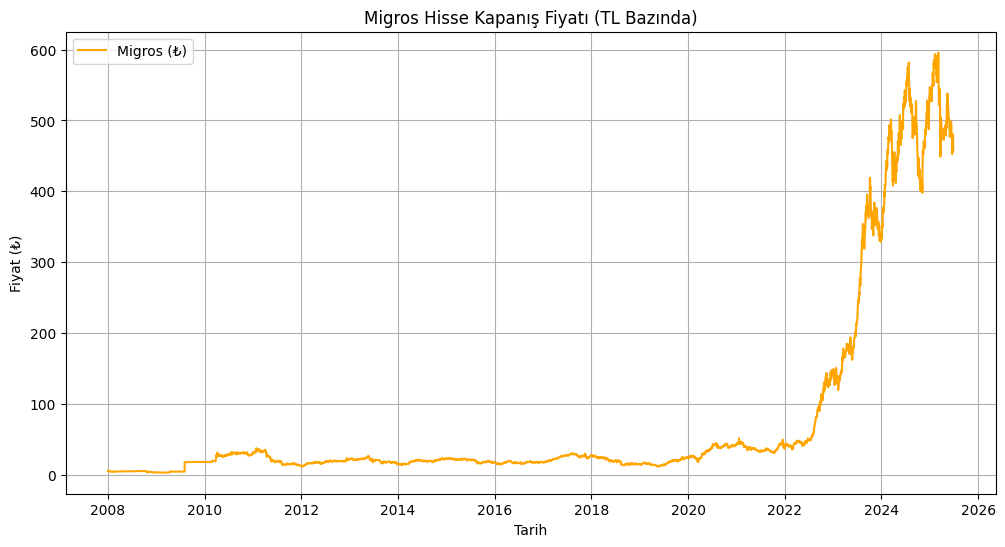

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(migros_usd["Date"], migros_usd["Close"], label="Migros (₺)", color="orange")

plt.title("Migros Hisse Kapanış Fiyatı (TL Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()
plt.show()


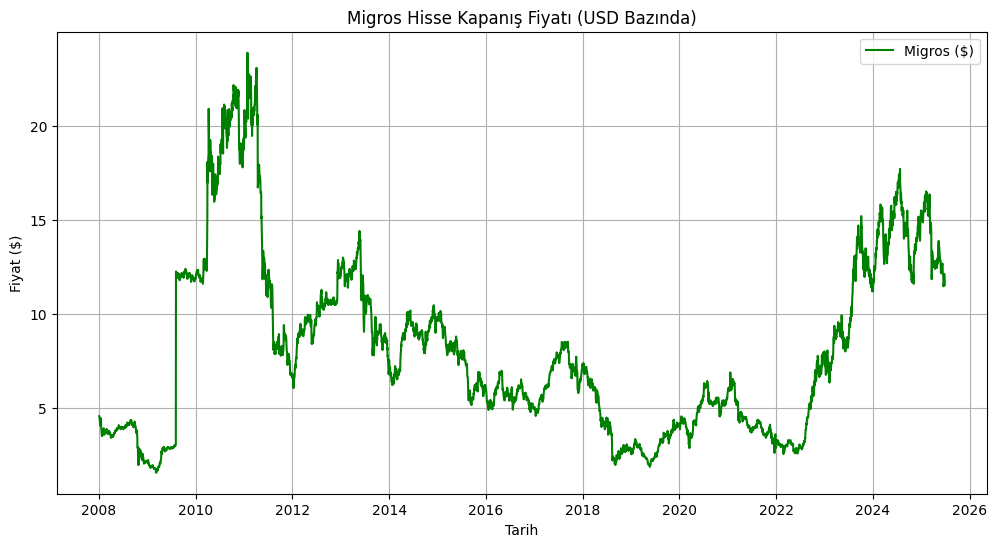

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(migros_usd["Date"], migros_usd["Close_USD"], label="Migros ($)", color="green")

plt.title("Migros Hisse Kapanış Fiyatı (USD Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.grid(True)
plt.legend()
plt.show()

## 4. ŞOK Marketler Analizi

Bu bölümde, `ŞOK Marketler` (SOKM.IS) hisse senedi verileri `yfinance` kütüphanesi aracılığıyla çekilmiştir. Ayrıca `USD/TRY` döviz kuru verisi eklenerek USD bazlı hisse fiyatı hesaplanmıştır. Her iki para birimi cinsinden zaman serisi görselleştirmeleri yapılmıştır.

In [ ]:
sok = yf.Ticker("SOKM.IS")
sok_data = sok.history(period="max")
sok_data.reset_index(inplace=True)
sok_data["Date"] = pd.to_datetime(sok_data["Date"]).dt.date

In [ ]:
usdtry = yf.Ticker("USDTRY=X")
usdtry_data = usdtry.history(period="max")
usdtry_data.reset_index(inplace=True)
usdtry_data["Date"] = pd.to_datetime(usdtry_data["Date"]).dt.date
usdtry_data = usdtry_data[["Date", "Close"]].rename(columns={"Close": "USDTRY_Close"})

In [ ]:
sok_usd = pd.merge(sok_data, usdtry_data, on="Date", how="inner")
sok_usd["Close_USD"] = sok_usd["Close"] / sok_usd["USDTRY_Close"]

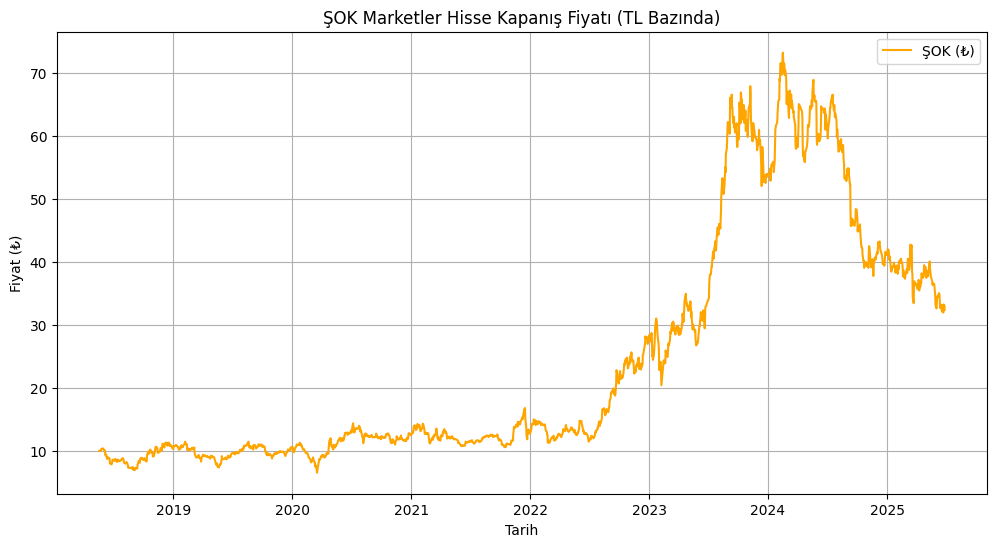

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sok_usd["Date"], sok_usd["Close"], label="ŞOK (₺)", color="orange")
plt.title("ŞOK Marketler Hisse Kapanış Fiyatı (TL Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()
plt.show()

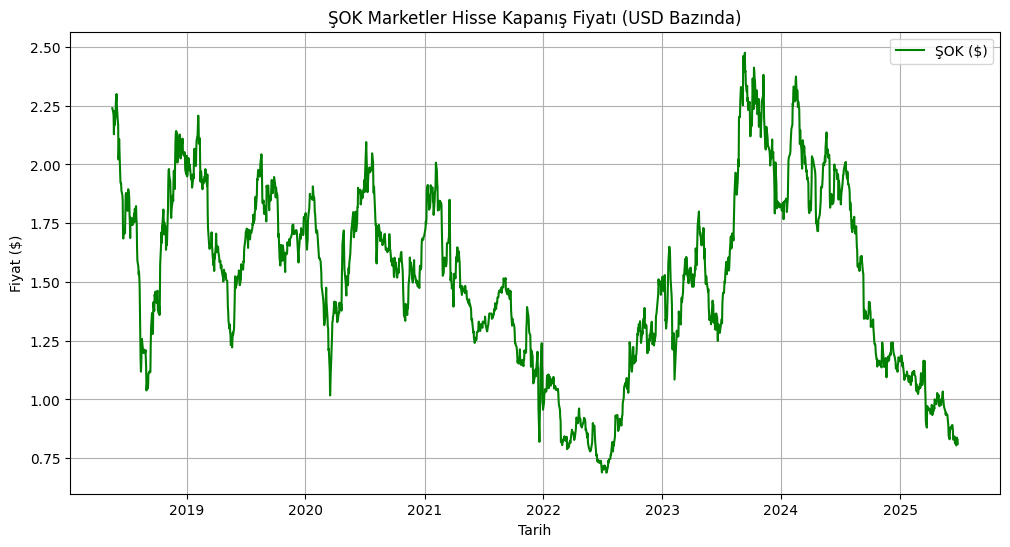

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sok_usd["Date"], sok_usd["Close_USD"], label="ŞOK ($)", color="green")
plt.title("ŞOK Marketler Hisse Kapanış Fiyatı (USD Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.grid(True)
plt.legend()
plt.show()


## 5. CarrefourSA Analizi

Bu bölümde, `CarrefourSA` (CRFSA.IS) hisse verileri `yfinance` üzerinden alınmış, ardından TL bazlı fiyatlar doğrudan, USD bazlı fiyatlar ise `USD/TRY` kuru kullanılarak hesaplanmıştır. Sonuçlar grafiklerle detaylı olarak sunulmuştur.


In [ ]:
carrefour = yf.Ticker("CRFSA.IS")
carrefour_data = carrefour.history(period="max")
carrefour_data.reset_index(inplace=True)
carrefour_data["Date"] = pd.to_datetime(carrefour_data["Date"]).dt.date

In [ ]:
usdtry = yf.Ticker("USDTRY=X")
usdtry_data = usdtry.history(period="max")
usdtry_data.reset_index(inplace=True)
usdtry_data["Date"] = pd.to_datetime(usdtry_data["Date"]).dt.date
usdtry_data = usdtry_data[["Date", "Close"]].rename(columns={"Close": "USDTRY_Close"})

In [ ]:
carrefour_usd = pd.merge(carrefour_data, usdtry_data, on="Date", how="inner")
carrefour_usd["Close_USD"] = carrefour_usd["Close"] / carrefour_usd["USDTRY_Close"]

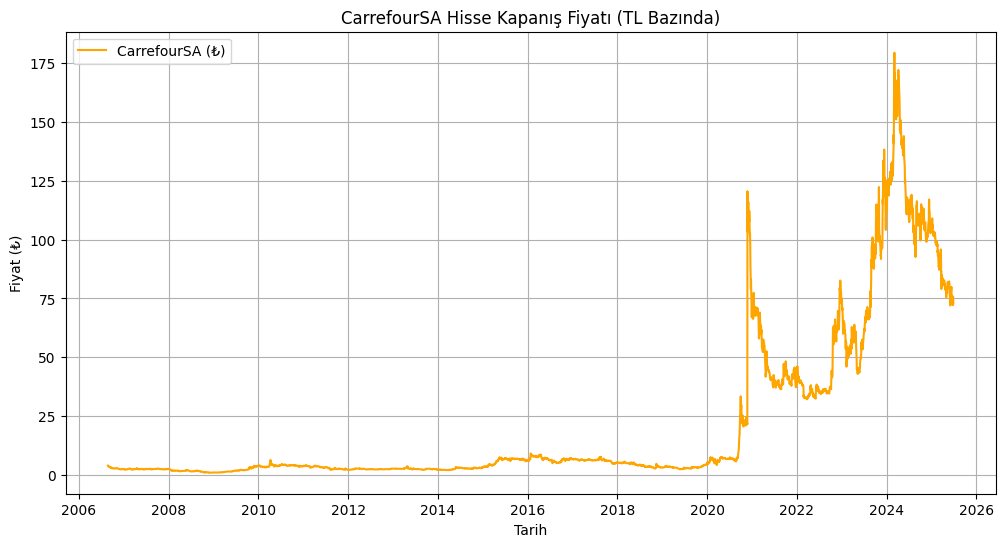

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(carrefour_usd["Date"], carrefour_usd["Close"], label="CarrefourSA (₺)", color="orange")
plt.title("CarrefourSA Hisse Kapanış Fiyatı (TL Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()
plt.show()


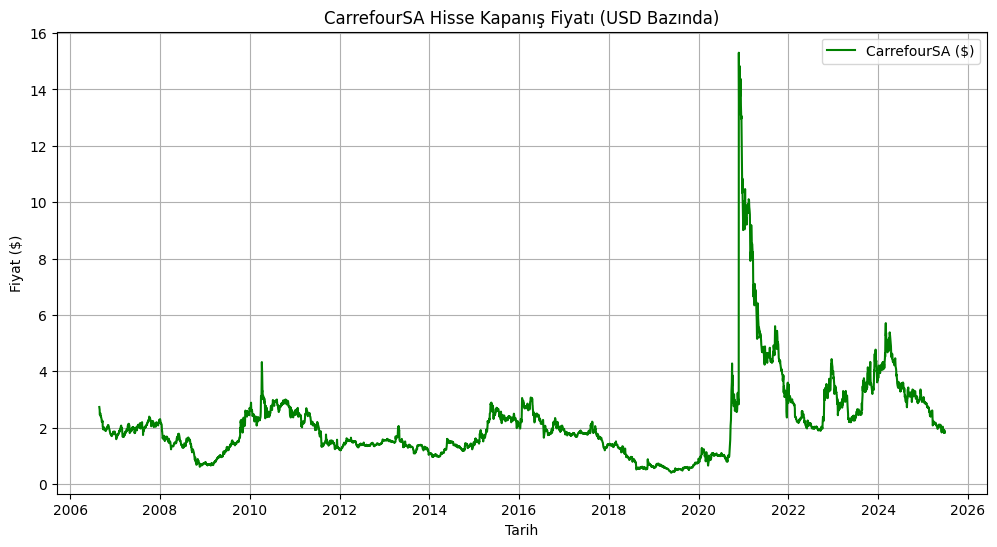

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(carrefour_usd["Date"], carrefour_usd["Close_USD"], label="CarrefourSA ($)", color="green")
plt.title("CarrefourSA Hisse Kapanış Fiyatı (USD Bazında)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.grid(True)
plt.legend()
plt.show()


##📊 TL Bazında Hisse Fiyatları Karşılaştırması
Bu grafik, BİM, Migros, ŞOK ve CarrefourSA şirketlerinin hisse kapanış fiyatlarının TL bazında yıllar içerisindeki değişimini karşılaştırmalı olarak göstermektedir. Grafik sayesinde sektördeki fiyat trendleri ve volatilite kıyaslaması yapılabilir.

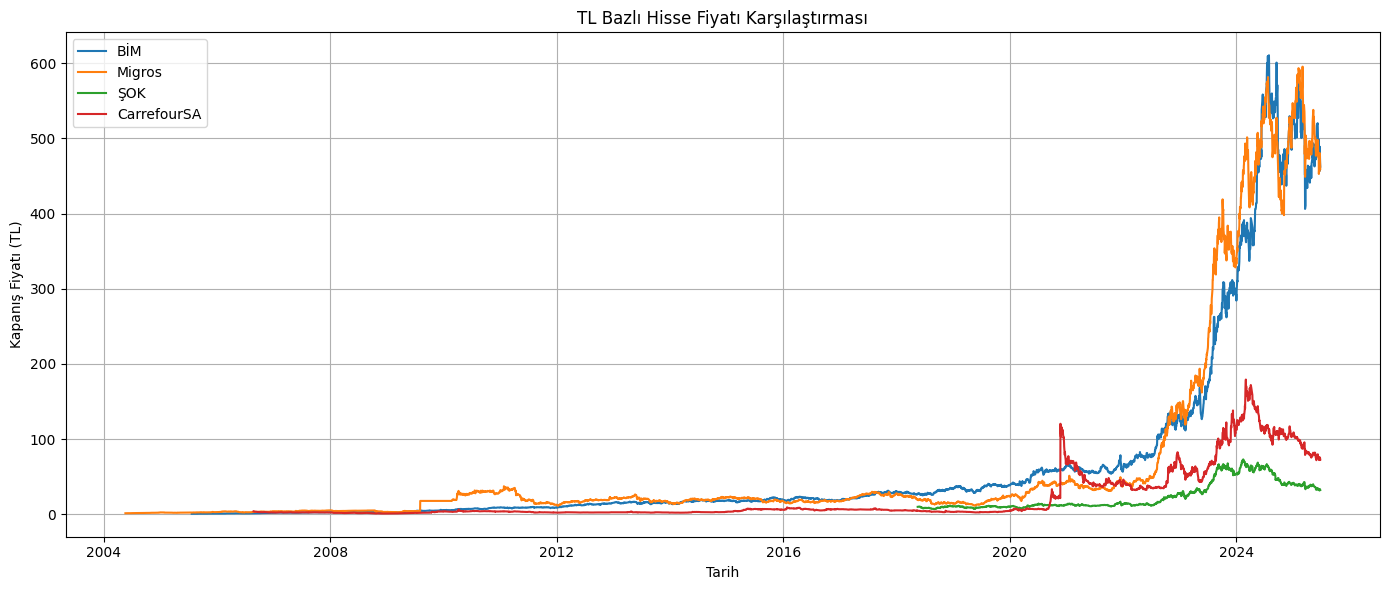

In [ ]:

plt.figure(figsize=(14, 6))
plt.plot(bim_data['Date'], bim_data['Close'], label='BİM')
plt.plot(migros_data['Date'], migros_data['Close'], label='Migros')
plt.plot(sok_data['Date'], sok_data['Close'], label='ŞOK')
plt.plot(carrefour_data['Date'], carrefour_data['Close'], label='CarrefourSA')

plt.title('TL Bazlı Hisse Fiyatı Karşılaştırması')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı (TL)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##📊 USD Bazında Hisse Fiyatları Karşılaştırması
Bu grafik, USD/TRY kuru ile düzeltilmiş şekilde, 4 şirketin USD bazlı hisse fiyatlarının zaman içindeki değişimini göstermektedir. Yabancı yatırımcı perspektifinden getirilerin nasıl farklılaştığı bu görselle analiz edilebilir

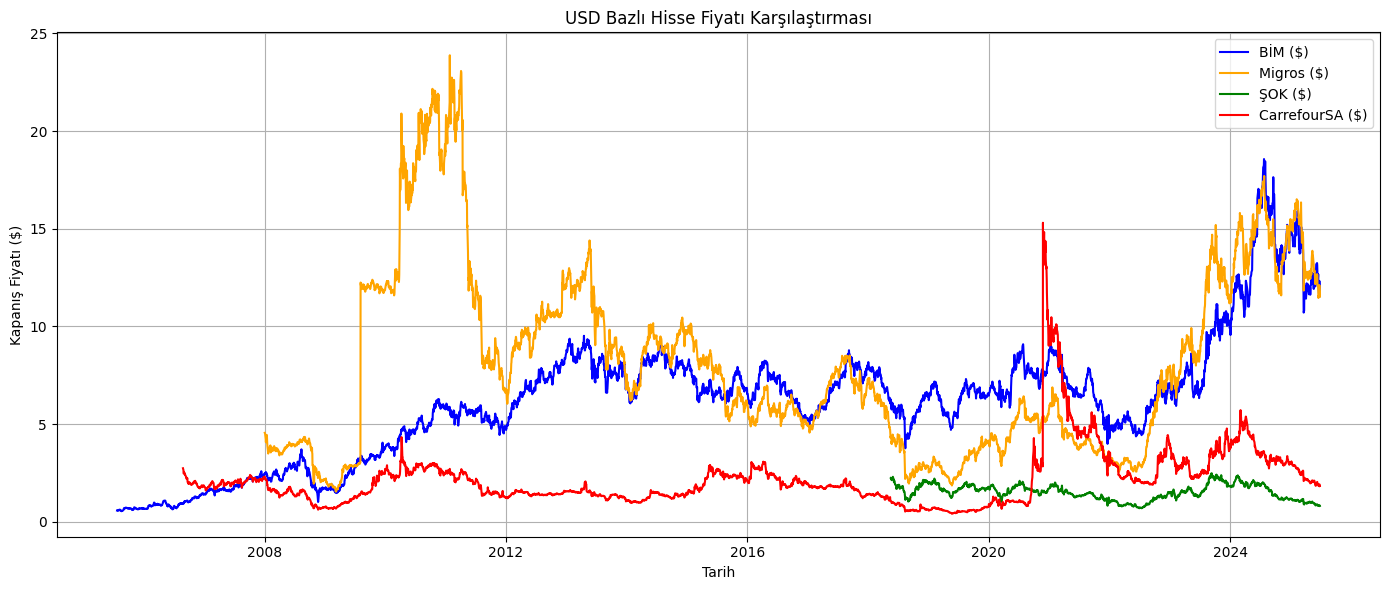

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(bim_usd['Date'], bim_usd['Close_USD'], label="BİM ($)", color='blue')
plt.plot(migros_usd['Date'], migros_usd['Close_USD'], label="Migros ($)", color='orange')
plt.plot(sok_usd['Date'], sok_usd['Close_USD'], label="ŞOK ($)", color='green')
plt.plot(carrefour_usd['Date'], carrefour_usd['Close_USD'], label="CarrefourSA ($)", color='red')

plt.title("USD Bazlı Hisse Fiyatı Karşılaştırması")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##📈 2020 Başına Göre Hisse Fiyatlarında Yüzde Değişim (TL Bazında)
Bu grafik, 2020 yılının başını %100 olarak baz alarak, takip eden yıllarda BİM, Migros, ŞOK ve CarrefourSA hisselerinin ne oranda değer kazandığını veya kaybettiğini göstermektedir. Normalize edilmiş bu yaklaşım, göreli performans analizi için uygundur.

In [ ]:
bim_tl = bim_data.copy()
migros_tl = migros_data.copy()
sok_tl = sok_data.copy()
carrefour_tl = carrefour_data.copy()

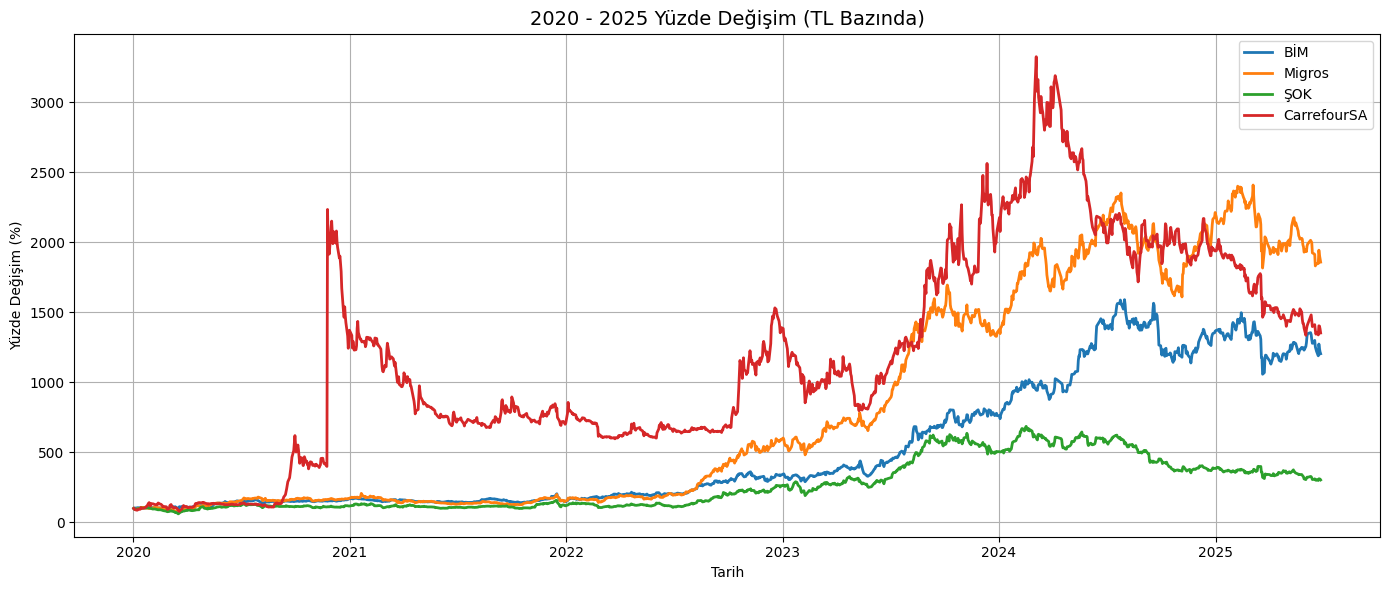

In [ ]:
start_date = pd.to_datetime("2020-01-01").date()

bim_tl_2020 = bim_tl[bim_tl["Date"] >= start_date].copy()
migros_tl_2020 = migros_tl[migros_tl["Date"] >= start_date].copy()
sok_tl_2020 = sok_tl[sok_tl["Date"] >= start_date].copy()
carrefour_tl_2020 = carrefour_tl[carrefour_tl["Date"] >= start_date].copy()

bim_tl_2020["Pct_Change"] = bim_tl_2020["Close"] / bim_tl_2020["Close"].iloc[0] * 100
migros_tl_2020["Pct_Change"] = migros_tl_2020["Close"] / migros_tl_2020["Close"].iloc[0] * 100
sok_tl_2020["Pct_Change"] = sok_tl_2020["Close"] / sok_tl_2020["Close"].iloc[0] * 100
carrefour_tl_2020["Pct_Change"] = carrefour_tl_2020["Close"] / carrefour_tl_2020["Close"].iloc[0] * 100

plt.figure(figsize=(14, 6))
plt.plot(bim_tl_2020["Date"], bim_tl_2020["Pct_Change"], label="BİM", linewidth=2)
plt.plot(migros_tl_2020["Date"], migros_tl_2020["Pct_Change"], label="Migros", linewidth=2)
plt.plot(sok_tl_2020["Date"], sok_tl_2020["Pct_Change"], label="ŞOK", linewidth=2)
plt.plot(carrefour_tl_2020["Date"], carrefour_tl_2020["Pct_Change"], label="CarrefourSA", linewidth=2)

plt.title("2020 - 2025 Yüzde Değişim (TL Bazında)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Yüzde Değişim (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##📈 30 Günlük Hareketli Ortalama ile Trend Analizi
Bu grafik, TL bazlı hisse kapanış fiyatlarının yanında 30 günlük hareketli ortalamalarını da göstermektedir. Kısa vadeli dalgalanmaları yumuşatarak daha sağlıklı bir trend incelemesi yapmayı sağlar.

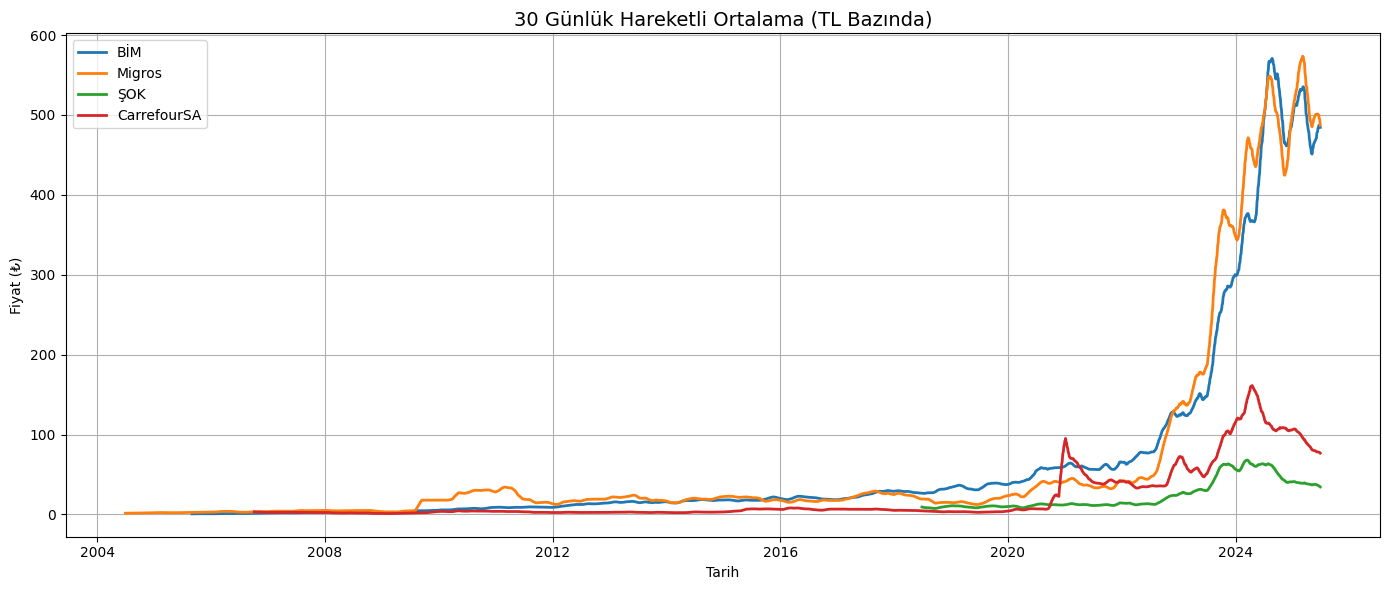

In [ ]:
bim_tl["MA_30"] = bim_tl["Close"].rolling(window=30).mean()
migros_tl["MA_30"] = migros_tl["Close"].rolling(window=30).mean()
sok_tl["MA_30"] = sok_tl["Close"].rolling(window=30).mean()
carrefour_tl["MA_30"] = carrefour_tl["Close"].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(bim_tl["Date"], bim_tl["MA_30"], label="BİM", linewidth=2)
plt.plot(migros_tl["Date"], migros_tl["MA_30"], label="Migros", linewidth=2)
plt.plot(sok_tl["Date"], sok_tl["MA_30"], label="ŞOK", linewidth=2)
plt.plot(carrefour_tl["Date"], carrefour_tl["MA_30"], label="CarrefourSA", linewidth=2)

plt.title("30 Günlük Hareketli Ortalama (TL Bazında)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##🗓 Yıla Göre TL Bazlı Hisse Fiyatları (Dropdown Menü ile Filtrelenebilir)
Bu görselleştirme, seçilen yıl özelinde 4 şirketin hisse kapanış fiyatlarının karşılaştırmalı analizini sunar. Kullanıcı, dropdown menü aracılığıyla farklı yılları seçerek yıl bazlı performansları inceleyebilir.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

bim_tl["Date"] = pd.to_datetime(bim_tl["Date"])
years = sorted(set(bim_tl[bim_tl["Date"] >= pd.Timestamp("2020-01-01")]["Date"].dt.year))

year_selector = widgets.Dropdown(
    options=years,
    value=years[0],
    description='Yıl:',
    disabled=False,
)

def plot_filtered_by_year(year):
    plt.figure(figsize=(14, 6))

    for df, name in zip([bim_tl, migros_tl, sok_tl, carrefour_tl], ["BİM", "Migros", "ŞOK", "CarrefourSA"]):
        df["Date"] = pd.to_datetime(df["Date"])
        yearly_data = df[df["Date"].dt.year == year]
        plt.plot(yearly_data["Date"], yearly_data["Close"], label=name)

    plt.title(f"{year} Yılı TL Bazlı Hisse Fiyatları", fontsize=14)
    plt.xlabel("Tarih")
    plt.ylabel("Fiyat (₺)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

widgets.interact(plot_filtered_by_year, year=year_selector);


interactive(children=(Dropdown(description='Yıl:', options=(2020, 2021, 2022, 2023, 2024, 2025), value=2020), …